In [1]:
from skimage.io import imread
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from instapipeline import QuantiusAnnotation, SpotAnnotationAnalysis, util, vis

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
img_filename = 'snr_5_0_density_0.006_spot_img.png'
img_filepath = './datasets/%s' % img_filename
csv_filepath = './datasets/snr_5_0_density_0.006_coord_snr_list.csv'
json_filepath = './datasets/Spot_density.json'
clustering_params = ['AffinityPropagation', -350]
img_height = len(imread(img_filepath))

In [3]:
qa = QuantiusAnnotation(json_filepath, img_filename)
sa = SpotAnnotationAnalysis(qa)
anno_all = qa.df()
clusters = sa.get_clusters(anno_all, clustering_params)        

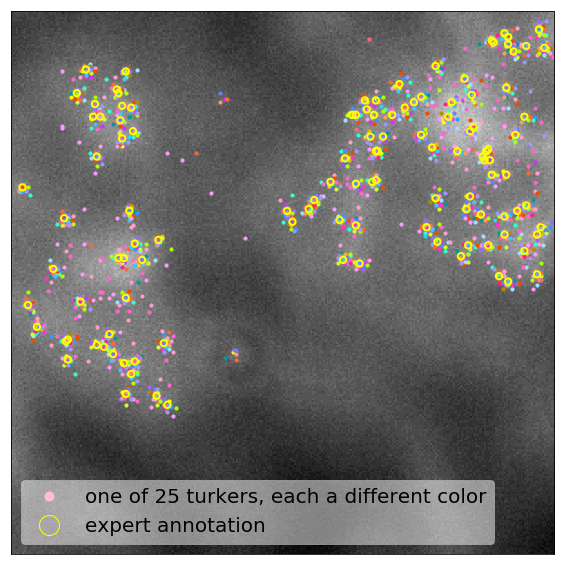

In [68]:
workers = util.get_workers(anno_all)
fig, ax = plt.subplots(figsize=(10,10))
for i, worker in enumerate(workers):
    worker_anno = util.slice_by_worker(anno_all, worker)
    x_list = list(worker_anno['x'])
    y_list = [img_height - y for y in list(worker_anno['y'])]
    plt.scatter(x_list, y_list, color=vis.colors[i], s=10)
    
textstr = 'one of %s turkers, each a different color' % len(workers)

h1 = Line2D([0],[0], marker='o', color='None', markerfacecolor='pink', markeredgecolor='None', label=textstr, markersize=10, linewidth=5)
h2 = Line2D([0],[0], marker='o', color='None', markerfacecolor='None', markeredgecolor='yellow', label='expert annotation', markersize=20, linewidth=10)
legend = plt.legend(handles=[h1, h2], loc='bottom center', frameon=1, prop={'size': 20}, framealpha=0.5)

ref = np.asarray(pd.read_csv(csv_filepath))
plt.scatter(ref[:,0], ref[:,1], facecolor='None', edgecolor='yellow', s=40, linewidth=2)

plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(imread(img_filepath), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.savefig("color_by_turker.pdf", transparent=True, bbox_inches="tight")

plt.show()